1.0               precision    recall  f1-score   support

           0       1.00      1.00      1.00       729

    accuracy                           1.00       729
   macro avg       1.00      1.00      1.00       729
weighted avg       1.00      1.00      1.00       729



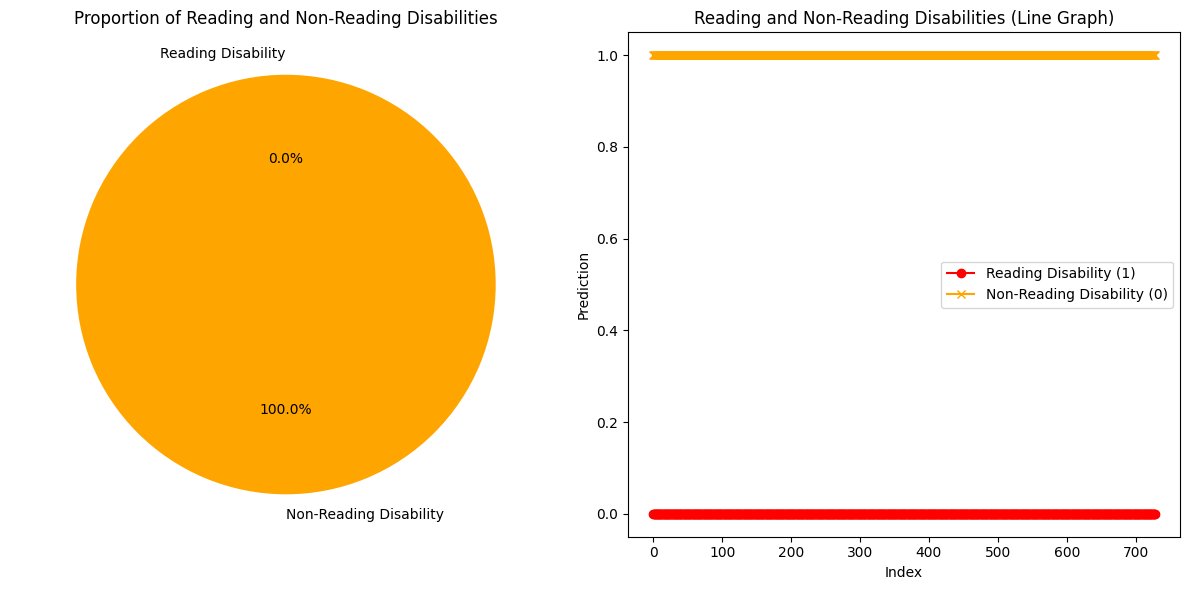

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder
import numpy as np # 
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Parse the data into a structured format
data=pd.read_csv("ct5129_dyslexia\\data\\Dyt-desktop.csv")
# Splitting the single column into multiple columns based on the delimiter';'
parsed_data = data.iloc[:, 0].str.split(';', expand=True)

# Step 2: Assign meaningful column names
columns = [
    "Gender", "NativeLang", "OtherLang", "Age",
    *(f"Clicks{i};Hits{i};Misses{i};Score{i};Accuracy{i};Missrate{i}".split(";") for i in range(1, 33)),
    "Dyslexia"
]
parsed_data.columns = [col for sublist in columns for col in (sublist if isinstance(sublist, list) else [sublist])]

# Step 3: Convert relevant columns to numerical and encode categorical features
# Example: Encoding Gender and NativeLang
parsed_data['Gender'] = LabelEncoder().fit_transform(parsed_data['Gender'])
parsed_data['NativeLang'] = LabelEncoder().fit_transform(parsed_data['NativeLang'])
parsed_data['OtherLang'] = LabelEncoder().fit_transform(parsed_data['OtherLang'])

# Convert numeric columns
for col in parsed_data.columns[3:]:  # Skipping first 3 non-numeric columns
    parsed_data[col] = pd.to_numeric(parsed_data[col], errors='coerce')

# Step 4: Handle missing values (if any)
parsed_data.fillna(parsed_data.mean(), inplace=True)

# Step 5: Select features and target
features = parsed_data.drop(columns=["Dyslexia"])
target = parsed_data["Dyslexia"]
target = LabelEncoder().fit_transform(target)  # Encode the target

# Step 6: Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Step 7: Train a kNN classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Step 8: Make predictions and evaluate
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(accuracy, classification_rep)
# Step 7: Analyze predictions
reading_disability_count = sum(y_pred == 1)
non_reading_disability_count = sum(y_pred == 0)

# Step 8: Pie Chart
labels = ["Reading Disability", "Non-Reading Disability"]
sizes = [reading_disability_count, non_reading_disability_count]
colors = ["red", "orange"]

plt.figure(figsize=(12, 6))

# Subplot 1: Pie Chart
plt.subplot(1, 2, 1)
plt.pie(sizes, labels=labels, colors=colors, autopct="%1.1f%%", startangle=90)
plt.title("Proportion of Reading and Non-Reading Disabilities")
plt.axis("equal")

# Step 9: Line Graph
# Assign indices for plotting
indices = range(len(y_pred))

plt.subplot(1, 2, 2)
plt.plot(indices, y_pred, color="red", label="Reading Disability (1)", marker='o')
plt.plot(indices, [1 - val for val in y_pred], color="orange", label="Non-Reading Disability (0)", marker='x')
plt.title("Reading and Non-Reading Disabilities (Line Graph)")
plt.xlabel("Index")
plt.ylabel("Prediction")
plt.legend()

# Show the combined plots
plt.tight_layout()
plt.show()

Accuracy of Decision Tree Classifier: 0.85
Total individuals with Reading Disability: 238
Total individuals without Reading Disability: 1949


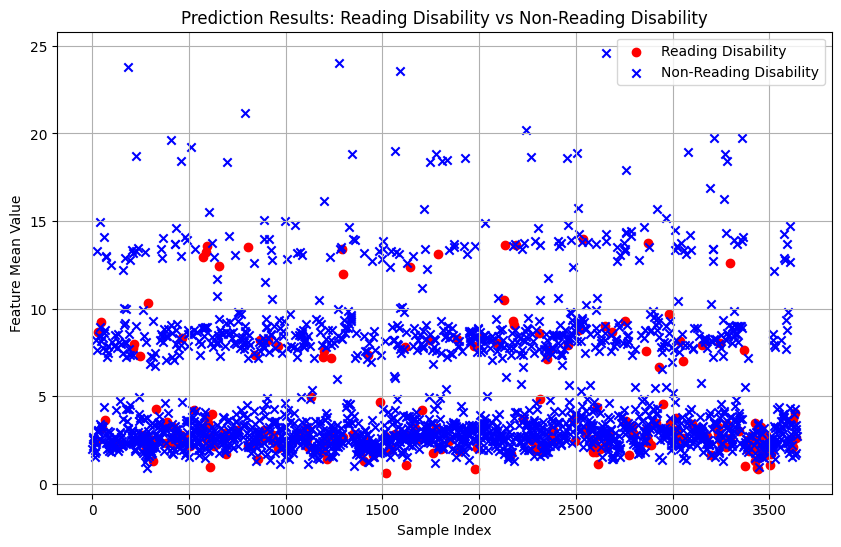

In [9]:
# Import required libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Step 1: Load the dataset
data = pd.read_csv('ct5129_dyslexia/data/Dyt-desktop.csv', engine='python')

# Step 2: Parse the dataset into structured columns
# Check and confirm the delimiter
parsed_data = data.iloc[:, 0].str.split(';', expand=True)

# Step 3: Assign column names dynamically
columns = ["Gender", "NativeLang", "OtherLang", "Age"]
for i in range(1, 33):
    columns.extend([f"Clicks{i}", f"Hits{i}", f"Misses{i}", f"Score{i}", f"Accuracy{i}", f"Missrate{i}"])
columns.append("Dyslexia")

# Validate the number of columns
if len(columns) != parsed_data.shape[1]:
    print(f"Warning: Column mismatch! Generated {len(columns)} names, but the dataset has {parsed_data.shape[1]} columns.")
    print("Adjusting column assignment to fit the dataset structure.")
    columns = columns[:parsed_data.shape[1]]

parsed_data.columns = columns

# Step 4: Encode categorical columns
encoder = LabelEncoder()
parsed_data["Gender"] = encoder.fit_transform(parsed_data["Gender"])
parsed_data["NativeLang"] = encoder.fit_transform(parsed_data["NativeLang"])
parsed_data["OtherLang"] = encoder.fit_transform(parsed_data["OtherLang"])
parsed_data["Dyslexia"] = encoder.fit_transform(parsed_data["Dyslexia"])

# Step 5: Convert numerical columns
for col in parsed_data.columns[3:]:
    parsed_data[col] = pd.to_numeric(parsed_data[col], errors='coerce')

# Handle missing values
parsed_data.fillna(parsed_data.mean(), inplace=True)

# Step 6: Define features and target
features = parsed_data.drop(columns=["Dyslexia"])
target = parsed_data["Dyslexia"]

# Step 7: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.6, random_state=42)

# Step 8: Train a Decision Tree Classifier
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)

# Step 9: Make predictions
y_pred = decision_tree.predict(X_test)

# Step 10: Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of Decision Tree Classifier: {accuracy:.2f}")

# Step 11: Separate predictions for visualization
read_disability_data = X_test[y_pred == 1]
non_read_disability_data = X_test[y_pred == 0]

# Step 12: Display counts of each category
total_read_disability = len(read_disability_data)
total_non_read_disability = len(non_read_disability_data)
print(f"Total individuals with Reading Disability: {total_read_disability}")
print(f"Total individuals without Reading Disability: {total_non_read_disability}")

plt.figure(figsize=(10, 6))

# Scatter points for reading disability
plt.scatter(
    read_disability_data.index, 
    read_disability_data.mean(axis=1), 
    label="Reading Disability", 
    color='red', 
    marker='o'
)

# Scatter points for non-reading disability
plt.scatter(
    non_read_disability_data.index, 
    non_read_disability_data.mean(axis=1), 
    label="Non-Reading Disability", 
    color='blue', 
    marker='x'
)

plt.title("Prediction Results: Reading Disability vs Non-Reading Disability")
plt.xlabel("Sample Index")
plt.ylabel("Feature Mean Value")
plt.legend()
plt.grid(True)
plt.show()

Fitting 5 folds for each of 90 candidates, totalling 450 fits
Optimized Accuracy of Decision Tree Classifier: 87.15%
Total individuals with Reading Disability: 145
Total individuals without Reading Disability: 2042


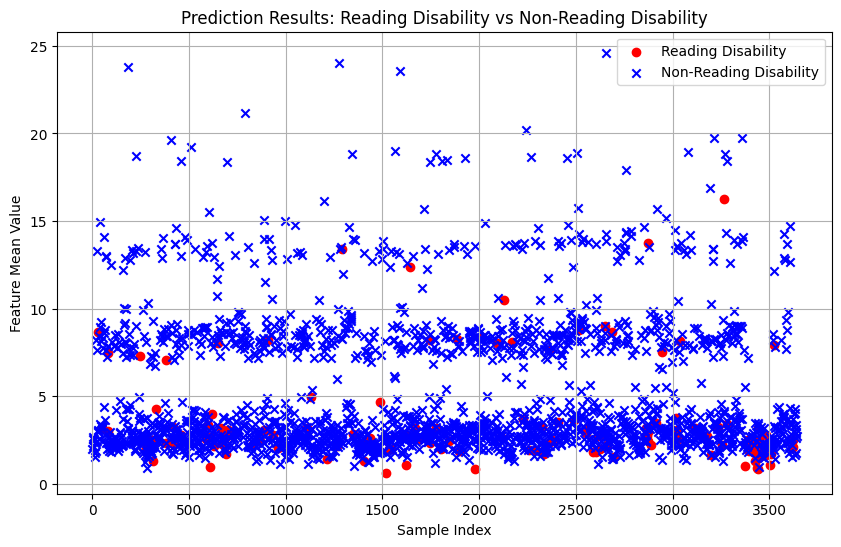

In [10]:
# Import required libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Step 1: Load the dataset
data = pd.read_csv('ct5129_dyslexia/data/Dyt-desktop.csv', engine='python')

# Step 2: Parse the dataset into structured columns
parsed_data = data.iloc[:, 0].str.split(';', expand=True)

# Step 3: Assign column names dynamically
columns = ["Gender", "NativeLang", "OtherLang", "Age"]
for i in range(1, 33):
    columns.extend([f"Clicks{i}", f"Hits{i}", f"Misses{i}", f"Score{i}", f"Accuracy{i}", f"Missrate{i}"])
columns.append("Dyslexia")

# Validate the number of columns
if len(columns) != parsed_data.shape[1]:
    print(f"Warning: Column mismatch! Generated {len(columns)} names, but the dataset has {parsed_data.shape[1]} columns.")
    columns = columns[:parsed_data.shape[1]]

parsed_data.columns = columns

# Step 4: Encode categorical columns
encoder = LabelEncoder()
parsed_data["Gender"] = encoder.fit_transform(parsed_data["Gender"])
parsed_data["NativeLang"] = encoder.fit_transform(parsed_data["NativeLang"])
parsed_data["OtherLang"] = encoder.fit_transform(parsed_data["OtherLang"])
parsed_data["Dyslexia"] = encoder.fit_transform(parsed_data["Dyslexia"])

# Step 5: Convert numerical columns
for col in parsed_data.columns[3:]:
    parsed_data[col] = pd.to_numeric(parsed_data[col], errors='coerce')

# Handle missing values
parsed_data.fillna(parsed_data.mean(), inplace=True)

# Step 6: Define features and target
features = parsed_data.drop(columns=["Dyslexia"])
target = parsed_data["Dyslexia"]

# Step 7: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.6, random_state=42)

# Step 8: Hyperparameter tuning using GridSearchCV
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5]
}

grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, scoring='accuracy', cv=5, verbose=1)
grid_search.fit(X_train, y_train)

# Step 9: Train the best model
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

# Step 10: Make predictions
y_pred = best_model.predict(X_test)

# Step 11: Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Optimized Accuracy of Decision Tree Classifier: {accuracy * 100:.2f}%")

# Step 12: Separate predictions for visualization
read_disability_data = X_test[y_pred == 1]
non_read_disability_data = X_test[y_pred == 0]

# Step 13: Display counts of each category
total_read_disability = np.sum(y_pred == 1)
total_non_read_disability = np.sum(y_pred == 0)
print(f"Total individuals with Reading Disability: {total_read_disability}")
print(f"Total individuals without Reading Disability: {total_non_read_disability}")

plt.figure(figsize=(10, 6))

# Scatter points for reading disability
plt.scatter(
    read_disability_data.index, 
    read_disability_data.mean(axis=1), 
    label="Reading Disability", 
    color='red', 
    marker='o'
)

# Scatter points for non-reading disability
plt.scatter(
    non_read_disability_data.index, 
    non_read_disability_data.mean(axis=1), 
    label="Non-Reading Disability", 
    color='blue', 
    marker='x'
)

plt.title("Prediction Results: Reading Disability vs Non-Reading Disability")
plt.xlabel("Sample Index")
plt.ylabel("Feature Mean Value")
plt.legend()
plt.grid(True)
plt.show()

Epoch 1/10


c:\Users\HP\keerthi\Desktop\Software\Machine-Learning\conda-python\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


46/46 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - accuracy: 0.8154 - loss: 0.5276 - val_accuracy: 0.8866 - val_loss: 0.3479
Epoch 2/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9020 - loss: 0.3256 - val_accuracy: 0.8866 - val_loss: 0.3402
Epoch 3/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9039 - loss: 0.3126 - val_accuracy: 0.8866 - val_loss: 0.3362
Epoch 4/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9091 - loss: 0.2953 - val_accuracy: 0.8866 - val_loss: 0.3315
Epoch 5/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9039 - loss: 0.2900 - val_accuracy: 0.8871 - val_loss: 0.3367
Epoch 6/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9039 - loss: 0.2855 - val_accuracy: 0.8866 - val_loss: 0.3472
Epoch 7/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9020 - loss: 0.3019 - val_accuracy: 0.8857 - val_loss: 0.3295
Epoch 8/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9017 - loss: 0.2864 - val_accuracy: 0.8797 - val_loss: 0.

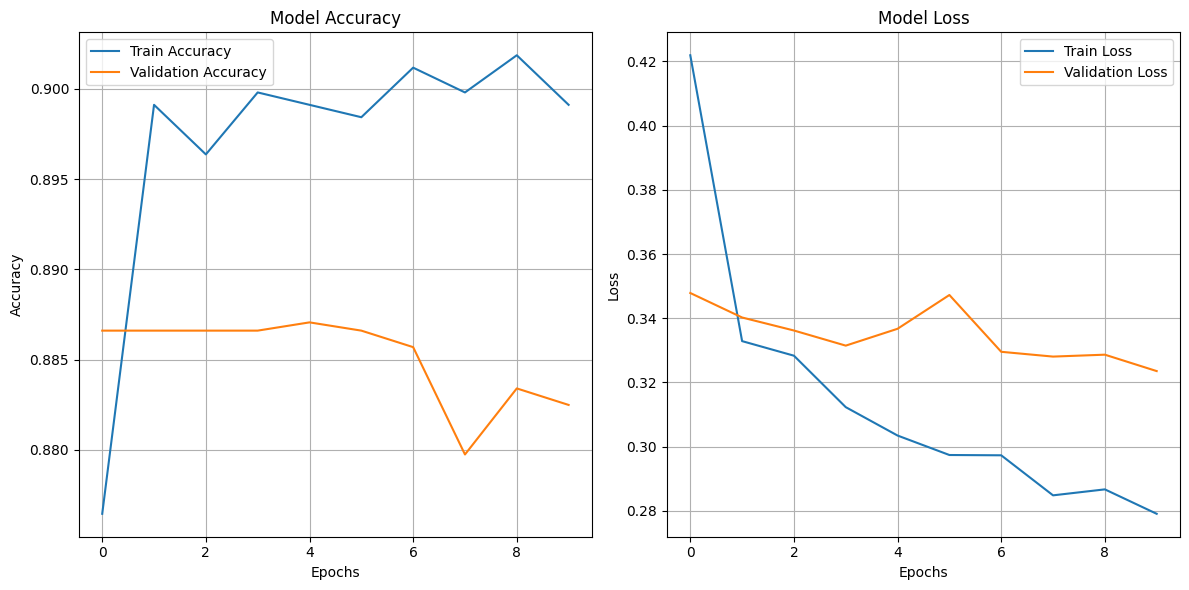

In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Dropout

# Step 1: Load the dataset
data = pd.read_csv('ct5129_dyslexia/data/Dyt-desktop.csv', engine='python')

# Step 2: Parse the dataset into structured columns
parsed_data = data.iloc[:, 0].str.split(';', expand=True)

# Step 3: Assign column names dynamically
columns = ["Gender", "NativeLang", "OtherLang", "Age"]
for i in range(1, 33):
    columns.extend([f"Clicks{i}", f"Hits{i}", f"Misses{i}", f"Score{i}", f"Accuracy{i}", f"Missrate{i}"])
columns.append("Dyslexia")

# Validate the number of columns
if len(columns) != parsed_data.shape[1]:
    print(f"Warning: Column mismatch! Generated {len(columns)} names, but the dataset has {parsed_data.shape[1]} columns.")
    columns = columns[:parsed_data.shape[1]]

parsed_data.columns = columns

# Step 4: Encode categorical columns
encoder = LabelEncoder()
parsed_data["Gender"] = encoder.fit_transform(parsed_data["Gender"])
parsed_data["NativeLang"] = encoder.fit_transform(parsed_data["NativeLang"])
parsed_data["OtherLang"] = encoder.fit_transform(parsed_data["OtherLang"])
parsed_data["Dyslexia"] = encoder.fit_transform(parsed_data["Dyslexia"])

# Step 5: Convert numerical columns
for col in parsed_data.columns[3:]:
    parsed_data[col] = pd.to_numeric(parsed_data[col], errors='coerce')

# Handle missing values
parsed_data.fillna(parsed_data.mean(), inplace=True)

# Step 6: Define features and target
features = parsed_data.drop(columns=["Dyslexia"]).values
target = parsed_data["Dyslexia"].values

# Ensure features are divisible by time_steps
time_steps = 10
num_features = features.shape[1]
num_features_per_step = num_features // time_steps

if num_features % time_steps != 0:
    # Pad with zeros to make divisible
    padding = time_steps - (num_features % time_steps)
    features = np.hstack((features, np.zeros((features.shape[0], padding))))
    num_features = features.shape[1]
    num_features_per_step = num_features // time_steps

# Reshape features for RNN input
features = features.reshape(features.shape[0], time_steps, num_features_per_step)

# Step 7: Standardize features
scaler = StandardScaler()
features = features.reshape(-1, num_features_per_step)  # Flatten for scaling
features = scaler.fit_transform(features)
features = features.reshape(-1, time_steps, num_features_per_step)  # Reshape back

# Step 8: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.6, random_state=42)

# Step 9: Build the RNN model
model = Sequential()
model.add(SimpleRNN(128, activation='relu', input_shape=(time_steps, num_features_per_step), return_sequences=True))
model.add(Dropout(0.3))
model.add(SimpleRNN(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))  # Binary classification

# Step 10: Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Step 11: Train the model with fewer epochs
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Step 12: Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# Step 13: Predict and analyze results
y_pred = (model.predict(X_test) > 0.5).astype(int).flatten()

# Separate predictions for visualization
read_disability_count = np.sum(y_pred == 1)
non_read_disability_count = np.sum(y_pred == 0)

print(f"Reading Disability: {read_disability_count}")
print(f"Non-Reading Disability: {non_read_disability_count}")

# Step 14: Visualize training history
plt.figure(figsize=(12, 6))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


Epoch 1/50


c:\Users\HP\keerthi\Desktop\Software\Machine-Learning\conda-python\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


92/92 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.8614 - loss: 0.4488 - val_accuracy: 0.8903 - val_loss: 0.3182
Epoch 2/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8935 - loss: 0.3285 - val_accuracy: 0.8903 - val_loss: 0.3012
Epoch 3/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9019 - loss: 0.3138 - val_accuracy: 0.8903 - val_loss: 0.2983
Epoch 4/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8941 - loss: 0.3081 - val_accuracy: 0.8903 - val_loss: 0.2898
Epoch 5/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8977 - loss: 0.2789 - val_accuracy: 0.8903 - val_loss: 0.2930
Epoch 6/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8934 - loss: 0.3049 - val_accuracy: 0.8903 - val_loss: 0.2857
Epoch 7/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8991 - loss: 0.2855 - val_accuracy: 0.8848 - val_loss: 0.2805
Epoch 8/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8882 - loss: 0.2781 - val_accuracy: 0.8903 - val_loss: 0.

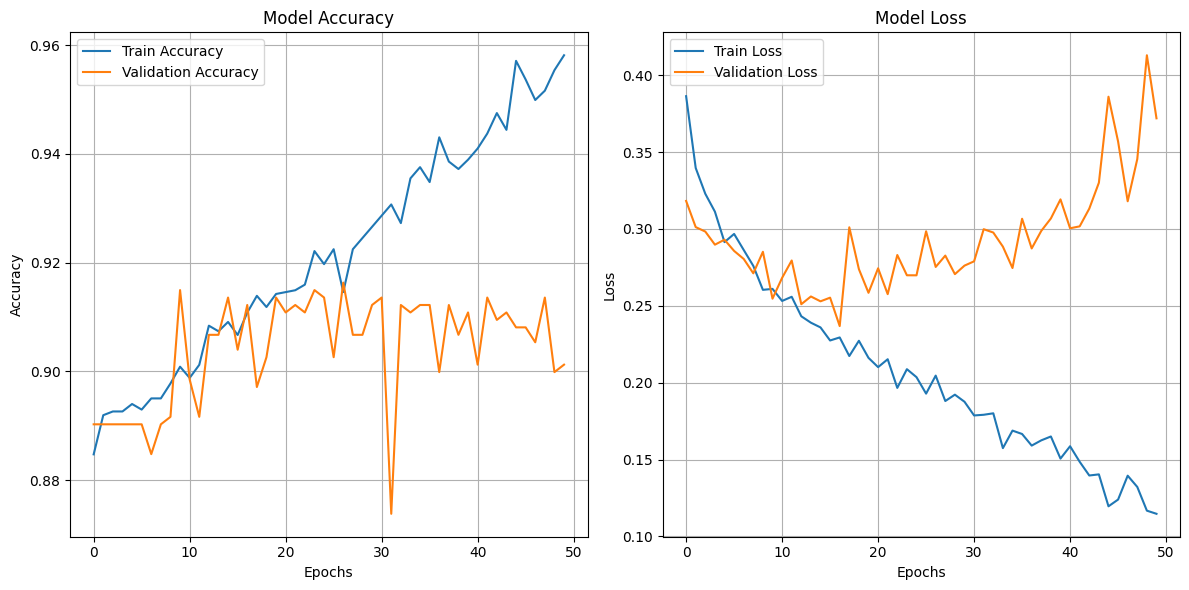

In [14]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Dropout

# Step 1: Load the dataset
data = pd.read_csv('ct5129_dyslexia/data/Dyt-desktop.csv', engine='python')

# Step 2: Parse the dataset into structured columns
parsed_data = data.iloc[:, 0].str.split(';', expand=True)

# Step 3: Assign column names dynamically
columns = ["Gender", "NativeLang", "OtherLang", "Age"]
for i in range(1, 33):
    columns.extend([f"Clicks{i}", f"Hits{i}", f"Misses{i}", f"Score{i}", f"Accuracy{i}", f"Missrate{i}"])
columns.append("Dyslexia")

# Validate the number of columns
if len(columns) != parsed_data.shape[1]:
    print(f"Warning: Column mismatch! Generated {len(columns)} names, but the dataset has {parsed_data.shape[1]} columns.")
    columns = columns[:parsed_data.shape[1]]

parsed_data.columns = columns

# Step 4: Encode categorical columns
encoder = LabelEncoder()
parsed_data["Gender"] = encoder.fit_transform(parsed_data["Gender"])
parsed_data["NativeLang"] = encoder.fit_transform(parsed_data["NativeLang"])
parsed_data["OtherLang"] = encoder.fit_transform(parsed_data["OtherLang"])
parsed_data["Dyslexia"] = encoder.fit_transform(parsed_data["Dyslexia"])

# Step 5: Convert numerical columns
for col in parsed_data.columns[3:]:
    parsed_data[col] = pd.to_numeric(parsed_data[col], errors='coerce')

# Handle missing values
parsed_data.fillna(parsed_data.mean(), inplace=True)

# Step 6: Define features and target
features = parsed_data.drop(columns=["Dyslexia"]).values
target = parsed_data["Dyslexia"].values

# Ensure features are divisible by time_steps
time_steps = 10
num_features = features.shape[1]
num_features_per_step = num_features // time_steps

if num_features % time_steps != 0:
    # Pad with zeros to make divisible
    padding = time_steps - (num_features % time_steps)
    features = np.hstack((features, np.zeros((features.shape[0], padding))))
    num_features = features.shape[1]
    num_features_per_step = num_features // time_steps

# Reshape features for RNN input
features = features.reshape(features.shape[0], time_steps, num_features_per_step)

# Step 7: Standardize features
scaler = StandardScaler()
features = features.reshape(-1, num_features_per_step)  # Flatten for scaling
features = scaler.fit_transform(features)
features = features.reshape(-1, time_steps, num_features_per_step)  # Reshape back

# Step 8: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Step 9: Build the RNN model
model = Sequential()
model.add(SimpleRNN(128, activation='relu', input_shape=(time_steps, num_features_per_step), return_sequences=True))
model.add(Dropout(0.3))
model.add(SimpleRNN(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))  # Binary classification

# Step 10: Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Step 11: Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Step 12: Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# Step 13: Predict and analyze results
y_pred = (model.predict(X_test) > 0.5).astype(int).flatten()

# Separate predictions for visualization
read_disability_count = np.sum(y_pred == 1)
non_read_disability_count = np.sum(y_pred == 0)

print(f"Reading Disability: {read_disability_count}")
print(f"Non-Reading Disability: {non_read_disability_count}")

# Step 14: Visualize training history
plt.figure(figsize=(12, 6))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()
